In [1]:
import sys
import numpy as np
import pyccl as ccl
sys.path.append('.')
import cosmography as cg
import matplotlib.pyplot as plt

In [2]:
sixdF = cg.Sixdf()
BOSS = cg.BOSSDR12()
eBOSS = cg.eBOSSDR16()
Vipers = cg.Vipers()
Wigglez = cg.Wigglez()
DSS = cg.DSS()
CC = cg.CC()
CMB = cg.CMB()
fastsound = cg.FastSound()
DS17 = cg.PantheonDS17(path='data/PantheonDS17/')

In [24]:
c = 299792458.0
z = np.linspace(0, 3, 101)
z_cmb = np.logspace(np.log10(1), np.log10(1001), 101)-1
fid_cosmo = ccl.CosmologyVanillaLCDM()
LCDM_Hz = fid_cosmo.cosmo.params.H0*ccl.h_over_h0(fid_cosmo, 1/(1+z))
LCDM_Da = ccl.comoving_angular_distance(fid_cosmo, 1/(1+z))
LCDM_Dm = ccl.comoving_radial_distance(fid_cosmo, 1/(1+z_cmb))
LCDM_Dz = ccl.growth_factor(fid_cosmo, 1/(1+z))
LCDM_fs8 = 0.81 * ccl.growth_factor(fid_cosmo, 1/(1+z))*ccl.growth_rate(fid_cosmo, 1/(1+z))

In [26]:
def to_err(cov):
    return np.sqrt(np.diag(cov))

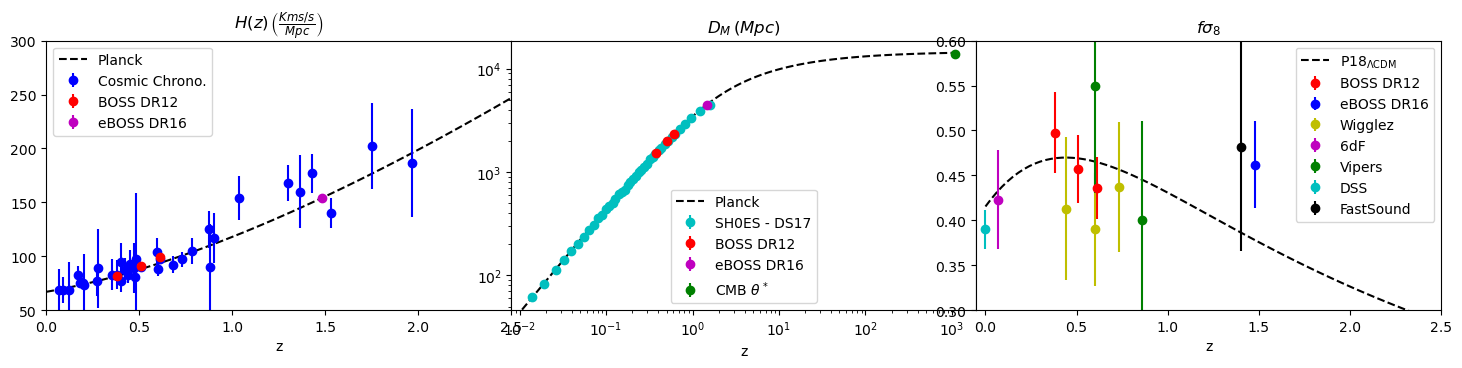

In [29]:
fig=plt.figure(figsize=(18,3.5))
fig.subplots_adjust(wspace=0.)

ax1 = plt.subplot(131)
plt.plot(z, LCDM_Hz, "k--", label='Planck')
plt.errorbar(CC.z, CC.data, yerr=to_err(CC.cov), fmt='bo', label='Cosmic Chrono.')
plt.errorbar(BOSS.z, BOSS.data[0:3], yerr=to_err(BOSS.cov)[0:3], fmt='ro', label='BOSS DR12')
plt.errorbar(eBOSS.z, c/1000/(eBOSS.data[0]*eBOSS.rd), yerr=to_err(eBOSS.cov)[0], fmt='mo', label='eBOSS DR16')
plt.xlim(0, 2.5)
plt.ylim(50, 300)
plt.xlabel("z")
plt.title(r"$H(z) \, \left(\frac{Kms/s}{Mpc} \right)$")
plt.legend();

ax1 = plt.subplot(132)
plt.plot(z_cmb, LCDM_Dm, "k--", label='Planck')
plt.errorbar(DS17.z, (10**((DS17.data-25+DS17.M_planck)/5))/(1+DS17.z),
             yerr=(10**(to_err(DS17.cov)/5))/(1+DS17.z), fmt='co', label='SH0ES - DS17')
plt.errorbar(BOSS.z, BOSS.data[3:6], yerr=to_err(BOSS.cov)[3:6], fmt='ro', label='BOSS DR12')
plt.errorbar(eBOSS.z, eBOSS.data[1]*eBOSS.rd, yerr=to_err(eBOSS.cov)[1]*eBOSS.rd, fmt='mo', label='eBOSS DR16')
plt.errorbar(CMB.z, (100*CMB.rs)/CMB.data, yerr=1/(100*CMB.rs)*(1/to_err(CMB.cov)), fmt='go', label=r'CMB $\theta^*$')
plt.xlabel("z")
plt.loglog()
plt.title(r"$D_M \, (Mpc)$")
plt.legend(loc=8);

ax1 = plt.subplot(133)
plt.plot(z, LCDM_fs8, 'k--', label=r"P18$_{\Lambda\rm{CDM}}$")

plt.errorbar(BOSS.z, BOSS.data[6:9], yerr=to_err(BOSS.cov)[6:9], fmt='ro', label="BOSS DR12")
plt.errorbar(eBOSS.z, eBOSS.data[-1], yerr=to_err(eBOSS.cov)[-1], fmt='bo', label="eBOSS DR16")
plt.errorbar(Wigglez.z, Wigglez.data, yerr=to_err(Wigglez.cov), fmt='yo', label="Wigglez")
plt.errorbar(sixdF.z, sixdF.data, yerr=to_err(sixdF.cov), fmt='mo', label="6dF")
plt.errorbar(Vipers.z, Vipers.data, yerr=to_err(Vipers.cov), fmt='go', label="Vipers")
plt.errorbar(DSS.z, DSS.data, yerr=to_err(DSS.cov), fmt='co', label="DSS")
plt.errorbar(fastsound.z, fastsound.data, yerr=to_err(fastsound.cov), fmt='ko', label="FastSound")

plt.xlim(-0.05, 2.5)
plt.ylim(0.3, 0.6)
plt.xlabel("z")
plt.title(r"$f \sigma_8$")
plt.legend();
